In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

# Load the data
files = [
    r'C:\Users\dell\Desktop\MyDocs\Docs\MK\97c98d51-8793-4ded-90de-fda30e84b85c-se_2023.csv.csv',
    r'C:\Users\dell\Desktop\MyDocs\Docs\MK\ad1d4846-20e3-440b-97e3-f14aa7655fff-se_2024.csv.csv',
    r'C:\Users\dell\Desktop\MyDocs\Docs\MK\d6184542-8fc2-4439-86df-f4f56f323114-se_2021.csv.csv',
    r'C:\Users\dell\Desktop\MyDocs\Docs\MK\c1778898-488f-4b68-bd1d-a6813165de73-se_2022.csv.csv'
]

df_list = [pd.read_csv(file) for file in files]
df = pd.concat(df_list, ignore_index=True)
df.head()

,EKSAMI_SOORITAJA,KUUPAEV,BYROO,KATEGOORIA,ERITINGIMUSED,VIIMANE_AUTOKOOL,SOIDUOPETAJA_KAASAS,EKSAMINEERIJA,SEISUND,KESTUS,KATK_POHJUS,MITTEARVESTATUD,VEAD
0,fb6f44a4e71821f2,2023-01,Valga,B,101,osaühing Kursus & Ko,E,bf2b7218d36e2a3d,MITTE_SOORITATUD,28.0,NaN,LIIKLUSOHUTUS|TEELPUSIMINE,NaN
1,82ed52e5990f8204,2023-01,Jõgeva,B,101,OÜ AUTOSÕIT,E,844452b4e4bac2ef,SOORITATUD,44.0,NaN,NaN,NaN
2,e72eeaf255d74785,2023-01,Narva,B,101|78,OSAÜHING ERMAN AUTOKOOL,E,d67d168bc8d04278,SOORITATUD,45.0,NaN,NaN,NaN
3,d0dd38daf0397c9d,2023-01,Valga,B,101,osaühing Kursus & Ko,J,bf2b7218d36e2a3d,MITTE_SOORITATUD,33.0,NaN,LIIKLUSOHUTUS,NaN
4,655194a10a21cd56,2023-01,Paide,B,101|78,Autokool Drive OÜ,E,f6097462dafbd97c,MITTE_SOORITATUD,18.0,NaN,PARKIMINE_MANOOVRIGA,EBAPIISAV_ETTEVALMISTUS|PARKIMINE_MARGISEL


In [3]:
# Convert date column to datetime
df['KUUPAEV'] = pd.to_datetime(df['KUUPAEV'], errors='coerce')

# Check for missing values
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

ERITINGIMUSED           50700
VIIMANE_AUTOKOOL        10218
SOIDUOPETAJA_KAASAS      4935
KESTUS                   5310
KATK_POHJUS            175125
MITTEARVESTATUD        103038
VEAD                   161715
dtype: int64

In [4]:
# Impute missing values for numeric columns
imputer = SimpleImputer(strategy='mean')
df['KESTUS'] = imputer.fit_transform(df[['KESTUS']])

# Drop rows with missing target values
df.dropna(subset=['SEISUND'], inplace=True)

# Check again for missing values
df.isnull().sum()

EKSAMI_SOORITAJA            0
KUUPAEV                     0
BYROO                       0
KATEGOORIA                  0
ERITINGIMUSED           50700
VIIMANE_AUTOKOOL        10218
SOIDUOPETAJA_KAASAS      4935
EKSAMINEERIJA               0
SEISUND                     0
KESTUS                      0
KATK_POHJUS            175125
MITTEARVESTATUD        103038
VEAD                   161715
dtype: int64

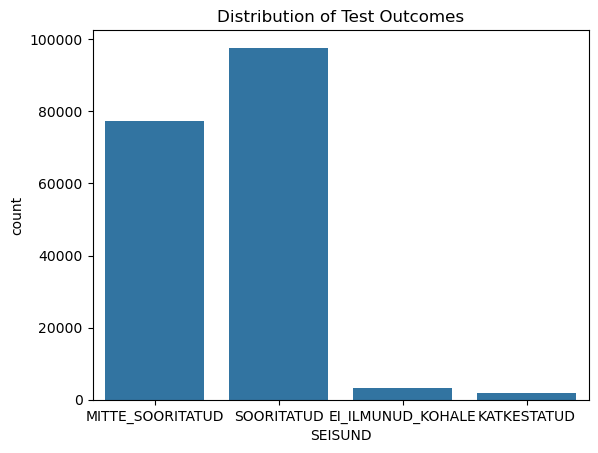

In [5]:
# Distribution of test outcomes
sns.countplot(x='SEISUND', data=df)
plt.title('Distribution of Test Outcomes')
plt.show()

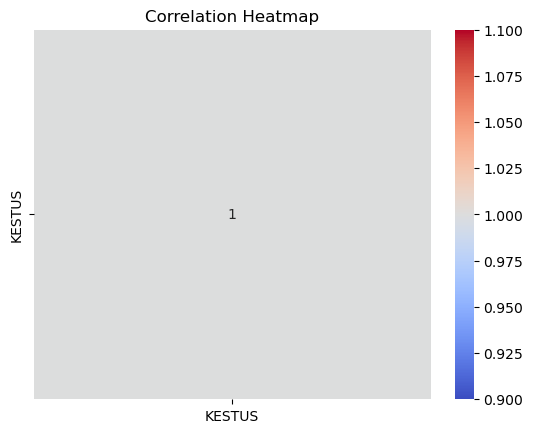

In [6]:
# Correlation heatmap for numeric features
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [7]:
# Reduce memory usage by selecting a subset of the data
df_sample = df.sample(frac=0.1, random_state=42)

# Prepare the data for modeling
X = df_sample.drop(columns=['SEISUND', 'KUUPAEV'])
y = df_sample['SEISUND']

# Convert categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True)

# Handle any remaining missing values
X = X.fillna(X.mean())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

accuracy, conf_matrix, class_report

(0.9681352175117761,
 array([[  82,    0,    0,    4],
        [   0,   34,    1,    5],
        [   0,    0, 1454,   96],
        [   0,    0,    9, 1924]], dtype=int64),
 '                   precision    recall  f1-score   support\n\nEI_ILMUNUD_KOHALE       1.00      0.95      0.98        86\n      KATKESTATUD       1.00      0.85      0.92        40\n MITTE_SOORITATUD       0.99      0.94      0.96      1550\n       SOORITATUD       0.95      1.00      0.97      1933\n\n         accuracy                           0.97      3609\n        macro avg       0.99      0.93      0.96      3609\n     weighted avg       0.97      0.97      0.97      3609\n')